#### Step 1- Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import os

#### Step 2- Import data

In [2]:
data=pd.read_excel(r'C:\Users\Asrar\Desktop\Data\NP_FY20.xlsx',index_col="Date")

In [3]:
data.head(5)

,Particular,Receipt no,Mode,Source,Details,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Mkt Name,Country
Date,,,,,,,,,,,,,,,,
2020-04-02,Purnima Mahajan,NP042021908,net_banking,Naukri,9312321528,Nehru Place,Hdfc,Retention,29500.00,25000.00,2250.00,2250.00,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry
2020-04-02,Mandeep Julius Gladwin,NP042021918,UPI,Digital Marketing,IMPS009313897101 / 9316328978,Nehru Place,Hdfc,Registration,500.01,423.73,38.14,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
2020-04-03,Prabhjot Kaur Sehgal,NP042021930,paynimo,Digital Marketing,1072254499,Nehru Place,Hdfc,Registration,500.01,423.73,38.14,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)
2020-04-04,Nataasha Bhardwaj,NP042021954,paynimo,Facebook Ads,1073239346,Nehru Place,Hdfc,Registration,500.01,423.73,38.14,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
2020-04-04,Divya,NP042021959,paynimo,General Call,1073257497,Nehru Place,Hdfc,Registration,500.01,423.73,38.14,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)


In [4]:
data.columns

Index(['Particular', 'Receipt no', 'Mode', 'Source', 'Details', 'Branch',
       'Bank', 'Towards', 'Amount', 'Actual Amount', 'CGST', 'SGST', 'IGST',
       'Client State', 'Mkt Name', 'Country'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 2020-04-02 to NaT
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Particular     608 non-null    object 
 1   Receipt no     607 non-null    object 
 2   Mode           584 non-null    object 
 3   Source         605 non-null    object 
 4   Details        584 non-null    object 
 5   Branch         608 non-null    object 
 6   Bank           578 non-null    object 
 7   Towards        608 non-null    object 
 8   Amount         608 non-null    float64
 9   Actual Amount  608 non-null    float64
 10  CGST           607 non-null    float64
 11  SGST           606 non-null    float64
 12  IGST           607 non-null    float64
 13  Client State   608 non-null    object 
 14  Mkt Name       608 non-null    object 
 15  Country        608 non-null    object 
dtypes: float64(5), object(11)
memory usage: 80.9+ KB


In [6]:
data.describe()

,Amount,Actual Amount,CGST,SGST,IGST
count,608.000000,608.000000,607.000000,606.000000,607.000000
mean,11106.587911,9412.358007,1432.011985,717.187521,220.528017
std,21365.824209,18106.632100,17671.535095,1457.886376,1312.605687
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.010000,423.730000,38.140000,38.140000,0.000000
50%,750.020000,635.600000,57.210000,57.210000,0.000000
75%,10000.000000,8474.580000,510.260000,381.360000,0.000000
max,177000.000000,150000.000000,434615.637542,7200.000000,14979.660000


#### Step 3- Work on Missing Values 

In [7]:
data.shape

(609, 16)

In [8]:
data.isnull().sum()

Particular        1
Receipt no        2
Mode             25
Source            4
Details          25
Branch            1
Bank             31
Towards           1
Amount            1
Actual Amount     1
CGST              2
SGST              3
IGST              2
Client State      1
Mkt Name          1
Country           1
dtype: int64

In [9]:
[i for i in data.columns if data[i].isnull().sum()>0]

['Particular',
 'Receipt no',
 'Mode',
 'Source',
 'Details',
 'Branch',
 'Bank',
 'Towards',
 'Amount',
 'Actual Amount',
 'CGST',
 'SGST',
 'IGST',
 'Client State',
 'Mkt Name',
 'Country']

In [10]:
data1=data.fillna({
    "Bank":"HDFC"
})

### Fill na in Bank columns because of Mode

In [11]:
data1["Mode"]=data1["Mode"].fillna(data1["Mode"].mode()[0])

In [12]:
data1["Mode"].isnull().sum()

0

#### Drop Unnecessary columns from the data

In [13]:
data2=data1.drop(["Details"],axis=1)
data2


,Particular,Receipt no,Mode,Source,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Mkt Name,Country
Date,,,,,,,,,,,,,,,
2020-04-02,Purnima Mahajan,NP042021908,net_banking,Naukri,Nehru Place,Hdfc,Retention,29500.00,25000.00,2250.000000,2250.00,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry
2020-04-02,Mandeep Julius Gladwin,NP042021918,UPI,Digital Marketing,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
2020-04-03,Prabhjot Kaur Sehgal,NP042021930,paynimo,Digital Marketing,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)
2020-04-04,Nataasha Bhardwaj,NP042021954,paynimo,Facebook Ads,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
2020-04-04,Divya,NP042021959,paynimo,General Call,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,PRITIKA R. PANDEY,NP032133318,cheque,Referrals,Nehru Place,HDFC,Retention,0.00,0.00,0.000000,0.00,0.0,Delhi,Garima Shingari,Canada - Express Entry
2021-03-31,PRITIKA R. PANDEY,NP032133319,UPI,Referrals,Nehru Place,Hdfc,Retention,5000.01,4237.29,381.360000,381.36,0.0,Delhi,Garima Shingari,Canada - Express Entry
2021-03-31,Jasmeet Singh,NP032133335,paynimo,Shine,Nehru Place,Hdfc,Retention,19528.02,16549.16,1489.430000,1489.43,0.0,Delhi,Sumita Singh,Canada - Express Entry


In [14]:
data2["IGST"]=data2["IGST"].fillna(data2["IGST"].mode()[0])

In [15]:
data2["CGST"]=data2["CGST"].fillna(data2["CGST"].mode()[0])

In [16]:
data2["SGST"]=data2["SGST"].fillna(data2["SGST"].mode()[0])

In [17]:
data3=data2.drop(["Particular","Receipt no"],axis=1)

In [18]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 2020-04-02 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mode           609 non-null    object 
 1   Source         605 non-null    object 
 2   Branch         608 non-null    object 
 3   Bank           609 non-null    object 
 4   Towards        608 non-null    object 
 5   Amount         608 non-null    float64
 6   Actual Amount  608 non-null    float64
 7   CGST           609 non-null    float64
 8   SGST           609 non-null    float64
 9   IGST           609 non-null    float64
 10  Client State   608 non-null    object 
 11  Mkt Name       608 non-null    object 
 12  Country        608 non-null    object 
dtypes: float64(5), object(8)
memory usage: 66.6+ KB


In [19]:
data4=data3.reset_index()

In [20]:
data4["Source"]=data4["Source"].fillna(data4["Source"].mode()[0])

In [21]:
data4

,Date,Mode,Source,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Mkt Name,Country
0,2020-04-02,net_banking,Naukri,Nehru Place,Hdfc,Retention,29500.00,25000.00,2250.000000,2250.00,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry
1,2020-04-02,UPI,Digital Marketing,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
2,2020-04-03,paynimo,Digital Marketing,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)
3,2020-04-04,paynimo,Facebook Ads,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Canada - Express Entry (self)
4,2020-04-04,paynimo,General Call,Nehru Place,Hdfc,Registration,500.01,423.73,38.140000,38.14,0.0,Delhi,Gurpreet Kaur Bawa,Canada - Canada - Express Entry (self)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,2021-03-31,cheque,Referrals,Nehru Place,HDFC,Retention,0.00,0.00,0.000000,0.00,0.0,Delhi,Garima Shingari,Canada - Express Entry
605,2021-03-31,UPI,Referrals,Nehru Place,Hdfc,Retention,5000.01,4237.29,381.360000,381.36,0.0,Delhi,Garima Shingari,Canada - Express Entry
606,2021-03-31,paynimo,Shine,Nehru Place,Hdfc,Retention,19528.02,16549.16,1489.430000,1489.43,0.0,Delhi,Sumita Singh,Canada - Express Entry
607,2021-03-31,paynimo,Referrals,Nehru Place,Hdfc,Retention,19528.02,16549.16,1489.430000,1489.43,0.0,Delhi,Sumita Singh,Canada - Express Entry


In [22]:
data4[data4.Amount==0]


,Date,Mode,Source,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Mkt Name,Country
33,2020-05-01,UPI,LinkedIn,Nehru Place,HDFC,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Sumita Singh,Canada - Express Entry
34,2020-05-01,UPI,LinkedIn,Nehru Place,HDFC,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Sumita Singh,Canada - Express Entry
39,2020-05-01,UPI,LinkedIn,Nehru Place,Hdfc,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Sumita Singh,Canada - Express Entry
40,2020-05-01,UPI,LinkedIn,Nehru Place,Hdfc,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Sumita Singh,Canada - Express Entry
41,2020-05-02,net_banking,Digital Marketing,Nehru Place,HDFC,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2021-03-03,net_banking,Facebook,Nehru Place,Nehru Place,Registration,0.0,0.0,0.0,0.0,0.0,Delhi,Nidhi Wadhwa,Canada - Canada - Educational Credential Asses...
564,2021-03-05,paynimo,Referrals,Nehru Place,Hdfc,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Nidhi Wadhwa,Canada - Express Entry
588,2021-03-23,net_banking,General Walk-in,Nehru Place,Nehru Place,Registration,0.0,0.0,0.0,0.0,0.0,Delhi,Swapnil Girhe,Canada - Canada - Dependent Visa (self)
590,2021-03-23,UPI,General Walk-in,Nehru Place,Hdfc,Retention,0.0,0.0,0.0,0.0,0.0,Delhi,Nidhi Wadhwa,Canada - Dependent Visa


In [23]:
data5=data4.drop(index=data4[data4["Amount"]==0].index)
### Removed 0 values from the Amount columns

In [24]:
data5=data5.drop(index=608)

In [25]:
### match the name of data
data5["Country"].replace({"Canada - Canada - Express Entry (self)":"Canada - Express Entry",
                          "Canada":"Canada - Express Entry",
                          "Canada - SINP - Canada - SINP - SINP (self)":"Canada - SINP - SINP",
                          "Australia - Australia - Skilled Migrant (self)":"Australia - Skilled Migrant",
                          "New Zealand - New Zealand - skilled migrant (self)":"New Zealand - skilled migrant",
                          "United Kingdom - United Kingdom - Business  Visa  (self)":"United Kingdom - Business  Visa"
                          },inplace=True)

In [26]:
data5["Source"].replace(["LinkedIn","LinkedIn"],inplace=True)

### Change the data type of few Columns

In [27]:
convert_dict={"Date":str,
              "Amount":int,
              "Actual Amount":int,
              "CGST":int,
              "SGST":int,
              "IGST":int
             }
data5=data5.astype(convert_dict)

#### Add new Month column in data

In [28]:
data5["Month"]=data5["Date"].str[5:7]

In [29]:
### Change data type of Month
data5["Month"]=data5["Month"].astype("int32")


#### Q- What is the Ratio of Registration and Retention?

In [30]:
towards_index=data5.Towards.value_counts().index
towards_value=data5.Towards.value_counts().values

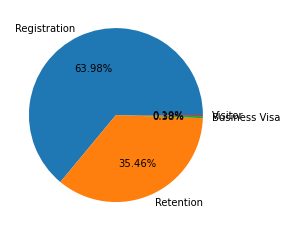

In [31]:
plt.pie(towards_value,labels=towards_index,autopct="%1.2f%%")
matplotlib.rcParams['figure.figsize'] = (25, 5)

plt.show()

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


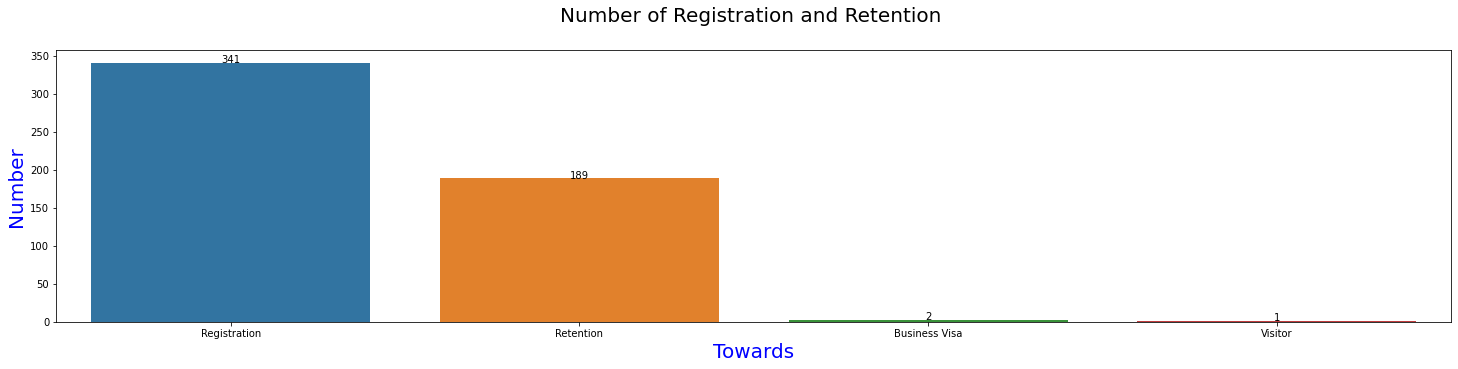

In [32]:
sns.barplot(towards_index,towards_value)
plt.xlabel("Towards",fontdict={"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Number",fontdict={"fontsize":20,"fontweight":5,"color":"blue"})
plt.title("Number of Registration and Retention \n",fontdict={"fontsize":20,"fontweight":5,"color":"black"})
for i in range(len(towards_index)):
    plt.text(i,towards_value[i],towards_value[i],ha="center")

plt.show()

In [33]:
data5.groupby("Towards")["Amount"].count().sort_values(ascending=False)

Towards
Registration     341
Retention        189
Business Visa      2
Visitor            1
Name: Amount, dtype: int64

### Q:- What is per lead average?

In [34]:
Sum_Source=data5.groupby("Source")["Amount"].sum().sort_values(ascending=False)
Number_Source=data5.groupby("Source")["Amount"].count().sort_values(ascending=False)

In [35]:
avearge_per_souce_lead=Sum_Source/Number_Source
avearge_per_souce_lead.sort_values(ascending=False)

Source
General Walk-in           29708.166667
Website                   23599.000000
Indeed                    19833.333333
Referrals                 15574.368421
Super Reception           13436.000000
Google Adword Campaign    11715.384615
Shine                     11684.454545
General Call              11630.312500
Naukri                    11401.384615
Facebook                  10331.034483
Monster                    8686.789474
ChatBot                    8614.317073
Digital Marketing          8606.086957
Linkedin                   1500.000000
Toll Free                  1000.000000
LinkedIn Paid               750.000000
Facebook Ads                625.000000
Facebook Comment            583.333333
Just Dial                   557.615385
Data                        500.000000
Now floats                  500.000000
Name: Amount, dtype: float64

### Q:- What is the Average per employee?

In [36]:
### Rename the Mkt Name column
data5.rename(columns={"Mkt Name":"Employee_name"},inplace= True)

In [37]:
### How Many Retention done in a year
Retention_1=data5[data5.Towards=="Retention"]
Retention_1

,Date,Mode,Source,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Employee_name,Country,Month
0,2020-04-02,net_banking,Naukri,Nehru Place,Hdfc,Retention,29500,25000,2250,2250,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,4
6,2020-04-06,net_banking,Digital Marketing,Nehru Place,Hdfc,Retention,10000,8474,762,762,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,4
24,2020-04-24,paynimo,Super Reception,Nehru Place,Hdfc,Retention,51345,43513,0,0,7832,Jharkhand,Nidhi Wadhwa,Canada - Express Entry,4
25,2020-04-25,paynimo,Referrals,Nehru Place,Hdfc,Retention,48348,40972,3687,3687,0,Delhi,Sumita Singh,Canada - Express Entry,4
27,2020-04-28,UPI,Referrals,Nehru Place,Hdfc,Retention,11800,10000,0,0,1800,Rajasthan,Sumita Singh,Canada - Express Entry,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2021-03-31,UPI,Facebook,Nehru Place,Hdfc,Retention,20000,16949,1525,1525,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,3
603,2021-03-31,UPI,Facebook,Nehru Place,Hdfc,Retention,8380,7101,639,639,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,3
605,2021-03-31,UPI,Referrals,Nehru Place,Hdfc,Retention,5000,4237,381,381,0,Delhi,Garima Shingari,Canada - Express Entry,3
606,2021-03-31,paynimo,Shine,Nehru Place,Hdfc,Retention,19528,16549,1489,1489,0,Delhi,Sumita Singh,Canada - Express Entry,3


### Total Retention done in Financial year 2020-2021 are 189

In [38]:
### How Many Registration done in a year
Registration_1=data5[data5.Towards=="Registration"]
Registration_1

,Date,Mode,Source,Branch,Bank,Towards,Amount,Actual Amount,CGST,SGST,IGST,Client State,Employee_name,Country,Month
1,2020-04-02,UPI,Digital Marketing,Nehru Place,Hdfc,Registration,500,423,38,38,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,4
2,2020-04-03,paynimo,Digital Marketing,Nehru Place,Hdfc,Registration,500,423,38,38,0,Delhi,Gurpreet Kaur Bawa,Canada - Express Entry,4
3,2020-04-04,paynimo,Facebook Ads,Nehru Place,Hdfc,Registration,500,423,38,38,0,Delhi,Dinesh Chand Upadhyay,Canada - Express Entry,4
4,2020-04-04,paynimo,General Call,Nehru Place,Hdfc,Registration,500,423,38,38,0,Delhi,Gurpreet Kaur Bawa,Canada - Express Entry,4
5,2020-04-06,net_banking,Shine,Nehru Place,Axis,Registration,500,423,38,38,0,Delhi,Ritu Madan,Canada - Express Entry,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2021-03-22,UPI,Facebook Comment,Nehru Place,Hdfc,Registration,750,635,57,57,0,Delhi,Nidhi Wadhwa,Canada - Express Entry,3
587,2021-03-22,paynimo,Monster,Nehru Place,Hdfc,Registration,750,635,57,57,0,Delhi,Rimsha Saifi,Canada - Express Entry,3
591,2021-03-23,paynimo,Referrals,Nehru Place,Hdfc,Registration,1500,1271,114,114,0,Delhi,Garima Shingari,Canada - Express Entry,3
593,2021-03-24,paynimo,Referrals,Nehru Place,Hdfc,Registration,1500,1271,114,114,0,Delhi,Garima Shingari,Canada - Express Entry,3


### Total registration done in Financial year 2020-2021 are 341

#### Q:- Total Retention Amount done by per source?

In [39]:
Source_Sum=Retention_1.groupby("Source")["Amount"].sum().sort_values(ascending=False)
Source_Sum

Source
Referrals                 3162088
Super Reception            992886
General Call               539255
ChatBot                    330398
Facebook                   288100
Naukri                     283186
Digital Marketing          186440
General Walk-in            176999
Monster                    155299
Google Adword Campaign     145800
Shine                      124529
Website                     70797
Indeed                      59000
Name: Amount, dtype: int32

#### Q:- Total Registration done by per source?

In [40]:
Source_Count=Retention_1.groupby("Source")["Amount"].count().sort_values(ascending=False)
Source_Count

Source
Referrals                 84
Super Reception           29
General Call              21
Facebook                  11
ChatBot                    9
Naukri                     9
Digital Marketing          5
Monster                    5
Shine                      5
General Walk-in            4
Website                    3
Google Adword Campaign     2
Indeed                     2
Name: Amount, dtype: int64

#### Q:- Amount avg per Source ?

In [41]:
Retention_avg_per_lead=Source_Sum/Source_Count
Retention_avg_per_lead.sort_values(ascending=False)

Source
Google Adword Campaign    72900.000000
General Walk-in           44249.750000
Referrals                 37643.904762
Digital Marketing         37288.000000
ChatBot                   36710.888889
Super Reception           34237.448276
Naukri                    31465.111111
Monster                   31059.800000
Indeed                    29500.000000
Facebook                  26190.909091
General Call              25678.809524
Shine                     24905.800000
Website                   23599.000000
Name: Amount, dtype: float64

#### Registration done by per source?

In [42]:
Registration_1.groupby("Source")["Amount"].count().sort_values(ascending=False)

Source
Referrals                 123
Super Reception            47
ChatBot                    31
General Call               27
Digital Marketing          18
Facebook                   18
Naukri                     17
Monster                    14
Just Dial                  13
Google Adword Campaign     11
Shine                       6
LinkedIn Paid               4
Facebook Comment            3
General Walk-in             2
Facebook Ads                2
Indeed                      1
Data                        1
Linkedin                    1
Now floats                  1
Toll Free                   1
Name: Amount, dtype: int64

#### Q:- Retention per Registration per Employee

In [43]:
Registration_per_employee=Registration_1.groupby("Employee_name")["Amount"].count().sort_values(ascending=False)
Registration_per_employee
## No of Registration done by per Employee

Employee_name
Dinesh Chand Upadhyay    98
Garima Shingari          87
Sumita Singh             74
Nidhi Wadhwa             50
Ritu Madan                6
Satendra Kumar            6
Jasmine Kaur              5
Gurpreet Kaur Bawa        4
Rimsha Saifi              4
Sohit Kumar Dixit         4
Manisha Kumari            2
satendra kumar            1
Name: Amount, dtype: int64

In [44]:
Retention_per_employee=Retention_1.groupby("Employee_name")["Amount"].count().sort_values(ascending=False)
Retention_per_employee
## No of Retention done by per Employee

Employee_name
Garima Shingari          61
Nidhi Wadhwa             48
Sumita Singh             47
Dinesh Chand Upadhyay    33
Name: Amount, dtype: int64

In [45]:
### To get the Ratio of Retention per Registration
Avg_retention_per_employee=Registration_per_employee/Retention_per_employee
Avg_retention_per_employee.sort_values(ascending=False)

Employee_name
Dinesh Chand Upadhyay    2.969697
Sumita Singh             1.574468
Garima Shingari          1.426230
Nidhi Wadhwa             1.041667
Gurpreet Kaur Bawa            NaN
Jasmine Kaur                  NaN
Manisha Kumari                NaN
Rimsha Saifi                  NaN
Ritu Madan                    NaN
Satendra Kumar                NaN
Sohit Kumar Dixit             NaN
satendra kumar                NaN
Name: Amount, dtype: float64

#### Q:- What is the Average of Employee per client in a year?

In [46]:
Sum_Retention=Retention_1.groupby("Employee_name")["Amount"].sum().sort_values(ascending=False)
No_Retention=Retention_1.groupby("Employee_name")["Amount"].count().sort_values(ascending=False)

In [47]:
Average_per_client=Sum_Retention/No_Retention
Average_per_client.sort_values(ascending=False)

Employee_name
Dinesh Chand Upadhyay    37188.606061
Garima Shingari          34603.606557
Sumita Singh             33995.000000
Nidhi Wadhwa             32895.166667
Name: Amount, dtype: float64

### Dinesh had the best average of retention per client  in a year 2020-2021

#### Q:- Registration done per Mode of Payment?

In [48]:
Registration_1.groupby("Mode")["Amount"].count().sort_values(ascending=False)

Mode
paynimo         129
UPI              91
net_banking      79
cash             18
Deposit          16
card_swipe        6
Cash              1
cash_deposit      1
Name: Amount, dtype: int64

#### Q:- Retention done per Mode of Payment?

In [49]:
Retention_1.groupby("Mode")["Amount"].count().sort_values(ascending=False)

Mode
net_banking     101
UPI              38
paynimo          21
card_swipe       19
cash_deposit      4
cheque            2
AED               1
Deposited         1
cash              1
coupon_code       1
Name: Amount, dtype: int64

### Conclusion: Client pay reg fee via easy way but for retention they prefer Net Banking

#### Q:- Number of registration done for per country?

In [50]:
num_reg_per_country=Registration_1.groupby("Country")["Amount"].count().sort_values(ascending=False)
num_reg_per_country

Country
Canada - Express Entry                                  254
Australia - Skilled Migrant                              42
Canada - Canada - Express Entry (spouse)                 24
Australia - Australia - Skilled Migrant (spouse)         10
Germany - Germany - Job Seeker Visa (self)                3
New Zealand - skilled migrant                             3
Canada - SINP - SINP                                      2
Hong Kong - Hong Kong - QMAS (self)                       1
New Zealand - New Zealand - skilled migrant (spouse)      1
United Kingdom - Business  Visa                           1
Name: Amount, dtype: int64

#### Q:- Number of retention done for per country?

In [51]:
num_reten_per_country=Retention_1.groupby("Country")["Amount"].count().sort_values(ascending=False)
num_reten_per_country

Country
Canada - Express Entry                               154
Australia - Skilled Migrant                           23
Canada - Dependent Visa                                4
Canada - SINP - SINP                                   4
Canada - Educational Credential Assessment (ECA)       2
New Zealand - skilled migrant                          1
United Kingdom - Business  Visa                        1
Name: Amount, dtype: int64

In [52]:
Avg_conversion_reg_to_reten=num_reten_per_country/num_reg_per_country
(Avg_conversion_reg_to_reten*100).sort_values(ascending=False)

Country
Canada - SINP - SINP                                    200.000000
Canada - Express Entry                                   60.629921
Australia - Skilled Migrant                              54.761905
New Zealand - skilled migrant                            33.333333
Australia - Australia - Skilled Migrant (spouse)               NaN
Canada - Canada - Express Entry (spouse)                       NaN
Canada - Dependent Visa                                        NaN
Canada - Educational Credential Assessment (ECA)               NaN
Germany - Germany - Job Seeker Visa (self)                     NaN
Hong Kong - Hong Kong - QMAS (self)                            NaN
New Zealand - New Zealand - skilled migrant (spouse)           NaN
United Kingdom - Business  Visa                                NaN
United Kingdom - Business  Visa                                NaN
Name: Amount, dtype: float64

### Conclusion SINP had highest percentage of conversion followed by Canada Express Entry

In [53]:
data5.to_excel("New_NP.xlsx")
### It is used to export stractured Data file python to excel

#### Q:- Number of Registration per Source per Employee?

In [54]:
reg_per_lead_by_Employee=Registration_1.groupby(["Employee_name","Source"])["Towards"].count()
print(reg_per_lead_by_Employee.to_string())### Its used for using to show all the data in the fram

Employee_name          Source                
Dinesh Chand Upadhyay  ChatBot                    6
                       Digital Marketing         12
                       Facebook                   7
                       Facebook Ads               1
                       Facebook Comment           1
                       General Call               6
                       General Walk-in            1
                       Google Adword Campaign     7
                       Just Dial                  2
                       LinkedIn Paid              1
                       Linkedin                   1
                       Monster                    2
                       Naukri                    12
                       Referrals                 19
                       Super Reception           19
                       Toll Free                  1
Garima Shingari        ChatBot                   12
                       Digital Marketing          1
                  

#### Q:- Number of Retention per Source per Employee?  

In [55]:
reten_per_lead_by_Employee=Retention_1.groupby(["Employee_name","Source"])["Towards"].count()
print(reten_per_lead_by_Employee.to_string())

Employee_name          Source                
Dinesh Chand Upadhyay  ChatBot                    2
                       Digital Marketing          5
                       Facebook                   5
                       General Call               2
                       General Walk-in            3
                       Google Adword Campaign     2
                       Monster                    2
                       Naukri                     7
                       Referrals                  2
                       Shine                      1
                       Super Reception            2
Garima Shingari        General Call              18
                       Indeed                     2
                       Referrals                 33
                       Super Reception            8
Nidhi Wadhwa           ChatBot                    2
                       Facebook                   6
                       General Walk-in            1
                  

#### Q:- Total Amount done by Registration for Each Country 

In [56]:
Registration_1.groupby("Country")["Amount"].sum().sort_values(ascending=False)

Country
Canada - Express Entry                                  165748
Australia - Skilled Migrant                              25500
Canada - Canada - Express Entry (spouse)                 16500
Australia - Australia - Skilled Migrant (spouse)          6500
New Zealand - skilled migrant                             2250
Germany - Germany - Job Seeker Visa (self)                1750
Canada - SINP - SINP                                      1000
Hong Kong - Hong Kong - QMAS (self)                        750
New Zealand - New Zealand - skilled migrant (spouse)       500
United Kingdom - Business  Visa                            500
Name: Amount, dtype: int32

##### Q:- Total Amount done by Retention for Each Country ?

In [57]:
Retention_1.groupby("Country")["Amount"].sum().sort_values(ascending=False)

Country
Canada - Express Entry                               5275831
Australia - Skilled Migrant                           877308
Canada - SINP - SINP                                  182900
Canada - Dependent Visa                               106199
Canada - Educational Credential Assessment (ECA)       59000
New Zealand - skilled migrant                          10000
United Kingdom - Business  Visa                         3539
Name: Amount, dtype: int32

#### Q:- Registration done for Each country per source?

In [58]:
Registratiom_per_source=Registration_1.groupby(["Country","Source"])["Towards"].count()
print(Registratiom_per_source.to_string())

Country                                               Source                
Australia - Australia - Skilled Migrant (spouse)      ChatBot                    4
                                                      Digital Marketing          1
                                                      General Call               2
                                                      Referrals                  3
Australia - Skilled Migrant                           ChatBot                    6
                                                      Facebook                   1
                                                      General Call               3
                                                      Google Adword Campaign     2
                                                      Just Dial                  3
                                                      LinkedIn Paid              1
                                                      Monster                    3
          

#### Q:- Rention done for per country per source?

In [59]:
Retention_per_source=Retention_1.groupby(["Country","Source"])["Towards"].count()
print(Retention_per_source.to_string())

Country                                            Source                
Australia - Skilled Migrant                        ChatBot                    5
                                                   General Call               3
                                                   Google Adword Campaign     1
                                                   Monster                    1
                                                   Referrals                 10
                                                   Super Reception            3
Canada - Dependent Visa                            General Walk-in            1
                                                   Super Reception            3
Canada - Educational Credential Assessment (ECA)   Indeed                     2
Canada - Express Entry                             ChatBot                    4
                                                   Digital Marketing          5
                                              

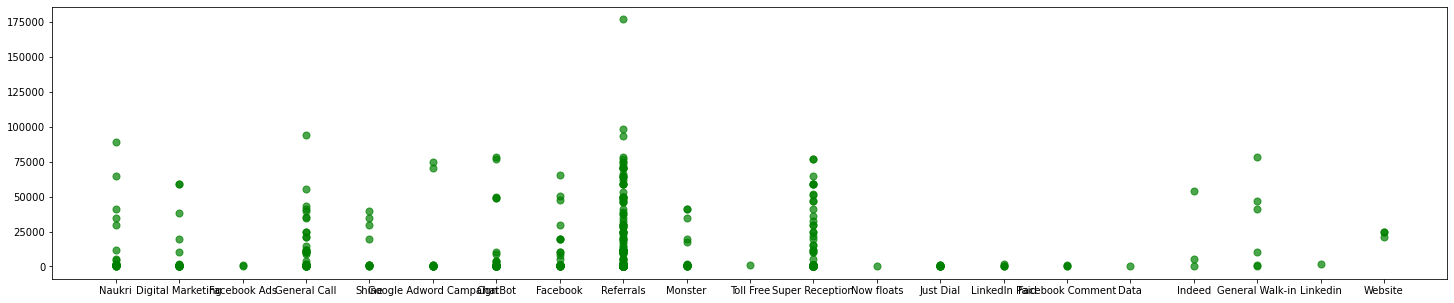

In [60]:
plt.scatter("Source","Amount",data=data5,alpha=0.7,s=50,c="green")
plt.show()

In [66]:
name=input("Enter the name")
for Employee_name in [reten_per_lead_by_Employee]:
    print(reten_per_lead_by_Employee)

Enter the nameSumita Singh
Employee_name          Source                
Dinesh Chand Upadhyay  ChatBot                    2
                       Digital Marketing          5
                       Facebook                   5
                       General Call               2
                       General Walk-in            3
                       Google Adword Campaign     2
                       Monster                    2
                       Naukri                     7
                       Referrals                  2
                       Shine                      1
                       Super Reception            2
Garima Shingari        General Call              18
                       Indeed                     2
                       Referrals                 33
                       Super Reception            8
Nidhi Wadhwa           ChatBot                    2
                       Facebook                   6
                       General Walk-in     